In [2]:
import numpy as np
from src.Space import Space
from src.Grid import Gradient
from src.Boundary import Boundary
import copy
import sys
import matplotlib.pyplot as plt
sys.setrecursionlimit(10000)
print(sys.getrecursionlimit())

10000


In [3]:
bins = (100,100,100)
x, y, z = (0,4*np.pi), (-2*np.pi,2*np.pi), (0,4*np.pi)
sp = [x,y,z]
sp = Space(sp, bins= bins)
space = sp.to_numpy()

In [3]:
sp.diff

[0.39269908169872414, 0.39269908169872414, 0.39269908169872414]

In [106]:
a = copy.copy(space[0,:,:,0])
a.shape

(100, 100)

In [126]:
class Solution():
    def __init__(self, sp: Space):
        self.condi = 0
        self.bins = sp.bins
        self.diff = sp.diff
        self.finish_L = [False for i in range(self.bins[2])]
        self.finish_W = [False for i in range(self.bins[2])]
        self.finish_dW = [False for i in range(self.bins[2])]
        self.finish_L[0], self.finish_L[-1] = True, True
        self.finish_W[0], self.finish_W[-1] = True, False
        a = copy.copy(sp.to_numpy()[0,:,:,0])
        self.result_L = [0 for i in range(bins[2])]
        self.result_W = [0 for i in range(bins[2])]
        self.result_dW = [0 for i in range(bins[2])]
        self.result_du = [0 for i in range(bins[2])]
    def reset(self,):
        self.finish_L = [False for i in range(bins[2])]
        self.finish_W = self.finish_L
        self.finish_L[0], self.finish_L[-1] = True, True
        self.finish_W[0], self.finish_W[-1] = True, False
    def gradient(self, shape, L, n, diff):
        delta_f0 = copy.copy(L) # shape (binx, biny)
        delta_f = delta_f0.take(np.arange(shape[n]-1, shape[n]), axis=n)
        #     delta_f = np.append(delta_f0.take(np.arange(1,shape[n]), axis=n), delta_f, axis=n)
        delta_f = np.concatenate((delta_f0.take(np.arange(1,shape[n]), axis=n), delta_f), axis=n)
        delta_f = delta_f - delta_f0
        delta_f = delta_f/diff
        return delta_f
    def _L(self, k):
        '''
        phi = potential
        L(k) = {phi(i,j,k) where i,j = 0, 1, 2 ... N} = phi(:,:,k)
        L(k).shape = (binx, biny)
        '''
        if (not self.finish_L[k]):
            self.result_L[k] = self._L(k-1)+ self._W(k-1)*self.diff[2]
            self.finish_L[k] = True
            return copy.copy(self.result_L[k])
        else:
            return copy.copy(self.result_L[k])
    def _W(self, k):
        if (not self.finish_W[k]):
#             self.result_W[k] = self._W(k-1) + self.dW(k-1)*self.diff[2]
            self.result_W[k] = self._W(k+1) - self.dW(k)*self.diff[2]
            
            self.finish_W[k] = True
            return copy.copy(self.result_W[k]) 
        else:
            return copy.copy(self.result_W[k])        
    def dW(self, k):
        if (not self.finish_dW[k]):
            self.result_du[k] = self.du(self._L(k))
            self.result_dW[k] = (self.condi - self.du(self._L(k)) - self.dv(self._L(k)) )
            self.finish_dW[k] = True
            return (self.condi - self.du(self._L(k)) - self.dv(self._L(k))) 
        else:
            return copy.copy(self.result_dW[k])      
    def du(self, L):
        shape = L.shape
        u = self.gradient(shape, L, 0, self.diff[0])
        return self.gradient(shape, u, 0, self.diff[0])
    def dv(self, L):
        shape = L.shape
        v = self.gradient(shape, L, 1, self.diff[1])
        return self.gradient(shape, v, 1, self.diff[1])
    def get_result(self,):
        self._L(self.bins[2]-2)
        for i in range(self.bins[2]):
            self.result_L[i]=np.expand_dims(self.result_L[i], axis=-1)
        return np.concatenate(self.result_L, axis=-1)

# def _W(k, N, diff):
#     if (not finish_W[k]):
#         result_W[k] = _W(k+1, N, diff) - _dW(k, N, diff)*diff[2]
#         finish_W[k] = True
#         return copy.copy(_W(k+1, N, diff) - _dW(k, N, diff)*diff[2])
#     else:
#         return copy.copy(result_W[k])
    

In [127]:
sol = Solution(sp)
sol.result_L[0], sol.result_L[-1] = np.squeeze(bdnp[2][0]), np.squeeze(bdnp[2][0])
sol.result_W[0] = np.squeeze(bdnp[2][0])*0

In [128]:
sol.result_du[0] = sol.du(sol.result_L[0])

In [124]:
sol.dW(0)
# sol.condi - sol.du(sol._L(0)) - sol.dv(sol._L(0))

array([[ 0.00000000e+00,  1.63290927e-02,  3.23954442e-02, ...,
        -3.23954442e-02, -1.63290927e-02,  0.00000000e+00],
       [ 1.63290927e-02,  6.47908884e-02,  1.12210174e-01, ...,
        -8.05987262e-02,  9.82440653e-01,  0.00000000e+00],
       [ 3.23954442e-02,  1.12210174e-01,  1.90219401e-01, ...,
        -1.27505145e-01,  1.96540256e+00,  0.00000000e+00],
       ...,
       [-3.23954442e-02, -8.05987262e-02, -1.27505145e-01, ...,
         6.47908884e-02, -1.99701401e+00,  0.00000000e+00],
       [-1.63290927e-02,  9.82440653e-01,  1.96540256e+00, ...,
        -1.99701401e+00, -2.02967219e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.81222777e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [129]:
sol.get_result().shape
# sol._L(10)

IndexError: list index out of range

# Test

In [6]:
def bcx(a):
    x, y, z = a[:,:,:,0], a[:,:,:,1], a[:,:,:,2]
    res = x*0+1
#     res = np.sin(x)*np.sin(y)*np.sin(z)
    return res
def bcy(a):
    x, y, z = a[:,:,:,0], a[:,:,:,1], a[:,:,:,2]
    res = x*0+2
    return 0*x+2
def bcz(a):
    x, y, z = a[:,:,:,0], a[:,:,:,1], a[:,:,:,2]
    return np.sin(x)*np.sin(y)+3

In [19]:
bound = Boundary(sp, func = ((bcx,bcx),(bcy,bcy),(bcz,bcz)), types = "Analytic")

In [20]:
bdnp =bound.get_bc()

In [49]:
sol = Solution(sp)

In [69]:
sol.result_L[0], sol.result_L[-1] = np.squeeze(bdnp[2][0]), np.squeeze(bdnp[2][0])
# result_W[-1] = np.squeeze(bdnp[2][0])*0
sol.result_W[0] = np.squeeze(bdnp[2][0])*0

In [174]:
bdnp[2][0]

array([[[3.        ],
        [3.        ],
        [3.        ],
        ...,
        [3.        ],
        [3.        ],
        [3.        ]],

       [[3.        ],
        [3.01602565],
        [3.03179344],
        ...,
        [2.96820656],
        [2.98397435],
        [3.        ]],

       [[3.        ],
        [3.03179344],
        [3.06307531],
        ...,
        [2.93692469],
        [2.96820656],
        [3.        ]],

       ...,

       [[3.        ],
        [2.96820656],
        [2.93692469],
        ...,
        [3.06307531],
        [3.03179344],
        [3.        ]],

       [[3.        ],
        [2.98397435],
        [2.96820656],
        ...,
        [3.03179344],
        [3.01602565],
        [3.        ]],

       [[3.        ],
        [3.        ],
        [3.        ],
        ...,
        [3.        ],
        [3.        ],
        [3.        ]]])

In [40]:
sol.reset()

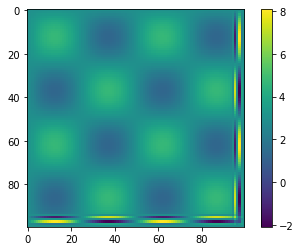

In [107]:
fig = plt.imshow(sol._L(7))
# x=du(result_L[0], diff)
# y=dv(result_L[0], diff)
# fig = plt.imshow(y)
plt.colorbar(fig)
plt.show()

In [127]:
result_W

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([

In [54]:
sol.result_du
sol.result_dW

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [12]:
_L(31, bins[2]-1, diff)

array([[3.        , 3.        , 3.        , ..., 3.        , 3.        ,
        3.        ],
       [3.        , 3.01602565, 3.03179344, ..., 2.96820656, 2.98397435,
        3.        ],
       [3.        , 3.03179344, 3.06307531, ..., 2.93692469, 2.96820656,
        3.        ],
       ...,
       [3.        , 2.96820656, 2.93692469, ..., 3.06307531, 3.03179344,
        3.        ],
       [3.        , 2.98397435, 2.96820656, ..., 3.03179344, 3.01602565,
        3.        ],
       [3.        , 3.        , 3.        , ..., 3.        , 3.        ,
        3.        ]])

In [137]:
finish_W

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [ ]:
_L(16, bins[2], diff)